Hola **Elias**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

## Descripción del proyecto
Contexto
Eres analista en una gran tienda online. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

#### Descripción de los datos
Datos utilizados en la primera parte del proyecto

/datasets/hypotheses_us.csv

- Hypotheses: breves descripciones de las hipótesis.
- Reach: alcance del usuario, en una escala del uno a diez.
- Impact: impacto en los usuarios, en una escala del uno al diez.
- Confidence: confianza en la hipótesis, en una escala del uno al diez.
- Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.


### Parte 1. Priorizar hipótesis
El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda online con Reach, Impact, Confidence y Effort especificados para cada una.

El ejercicio consiste en:

# Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
- Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
- Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.


In [58]:
# se importan las librerias necesarias para el analisis de datos
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import scipy.stats as stats
from matplotlib import pyplot as plt


def looks(datos):
    """Genera un análisis de todo el set de datos de manera global"""

    print("Se ejecuta la descripción de los datos:")
    print(datos.describe(include="all"))
    print()
    print("se hace exploración con método info:")
    print(datos.info())
    print()
    print("se hace una observación con el método Sample:")
    if len(datos) > 10:
        print(datos.sample(10))
    else:
        print(datos)
    print()
    print("hay NA?:")
    print(datos.isna().sum())
    print()
    print("Duplicados:")
    print(datos.duplicated().sum())

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

El código en el módulo custom deberías incluirlo en este notebook, ya que para fines de revisión necesito ver que código estas generando y cómo lo estás aplicando
</div>

In [59]:
hypot = pd.read_csv('datasets/hypotheses_us.csv', sep=';')

In [60]:
hypot['ICE'] = (hypot['Impact'] * hypot['Confidence']) / hypot['Effort']
hypot['ICE'] = [round(a*10/max(hypot['ICE']), 2) for a in hypot['ICE']]
hypot['RICE'] = (hypot['Reach'] * hypot['Impact'] *
                hypot['Confidence']) / hypot['Effort']
hypot['RICE'] = [round(a*10/max(hypot['RICE']), 2) for a in hypot['RICE']]

hypot

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,8.23,3.57
1,Launch your own delivery service. This will sh...,2,5,4,10,1.23,0.36
2,Add product recommendation blocks to the store...,8,3,7,3,4.32,5.00
3,Change the category structure. This will incre...,8,3,3,8,0.69,0.80
4,Change the background color on the main page. ...,3,1,1,1,0.62,0.27
5,Add a customer review page. This will increase...,3,2,2,3,0.82,0.36
6,Show banners with current offers and sales on ...,5,3,8,3,4.94,3.57
7,Add a subscription form to all the main pages....,10,7,8,5,6.91,10.00
8,Launch a promotion that gives users discounts ...,1,9,9,5,10.00,1.45



#### La diferencia en los cambios puede estar explicada por la inclusión de la variable alcance. Al tener este dato, las prioridades se ven modificadas, de modo que la hipótesis 7 es más relevante acorde al RICE en contraste con la hipótesis 10 acorde al ICE

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el cálculo para la priorización con los diferentes frameworks! También podrías presentar en gráfica este tipo de comparaciones ya que es es muy bueno para que sea mucho más entendible la comparación
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>

Hola! que tipo de grafica seria la ideal o recomendada para representar la comparación? Una heatmat? 

Saludos :)  (he hecho las demas correciones del proyecto)
</div>

#### Datos utilizados en la segunda parte del proyecto

/datasets/orders_us.csv

- transactionId: identificador de pedido.
- visitorId: identificador del usuario que realizó el pedido.
- date: fecha del pedido.
- revenue: ingresos del pedido.
- group: el grupo del test A/B al que pertenece el usuario.


/datasets/visits_us.csv

- date: la fecha.
- group: grupo de la prueba A/B.
 - visits: el número de visitas en la fecha especificada en el grupo de pruebas A/B especificado.

Asegúrate de preprocesar los datos. Es posible que haya errores en los datasets originales; por ejemplo, algunos de los visitantes podrían haber entrado tanto en el grupo A como en el grupo B.

#### Parte 2. Análisis del test A/B
Realizaste una prueba A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visits_us.csv.

Ejercicio

Analiza el test A/B:

- Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.
- Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.
- Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.
- Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.
- Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.
- Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.
- Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.
- Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.
- Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
- Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
- Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
- Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
- Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 
    1. Parar la prueba, considerar a uno de los grupos como líder. 
    2. Parar la prueba, concluir que no hay diferencia entre los grupos. 
    3. Continuar la prueba.

In [61]:
orders = pd.read_csv("datasets/orders_us.csv")
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

looks(orders)

Se ejecuta la descripción de los datos:
        transactionId     visitorId                           date  \
count    1.197000e+03  1.197000e+03                           1197   
unique            NaN           NaN                            NaN   
top               NaN           NaN                            NaN   
freq              NaN           NaN                            NaN   
mean     2.155621e+09  2.165960e+09  2019-08-15 13:06:46.015037696   
min      1.062393e+06  5.114589e+06            2019-08-01 00:00:00   
25%      1.166776e+09  1.111826e+09            2019-08-08 00:00:00   
50%      2.145194e+09  2.217985e+09            2019-08-15 00:00:00   
75%      3.237740e+09  3.177606e+09            2019-08-23 00:00:00   
max      4.293856e+09  4.283872e+09            2019-08-31 00:00:00   
std      1.229085e+09  1.236014e+09                            NaN   

             revenue group  
count    1197.000000  1197  
unique           NaN     2  
top              NaN     B  
fre

In [62]:
visits = pd.read_csv("datasets/visits_us.csv")
visits['date'] = pd.to_datetime(visits['date'])

looks(visits)

Se ejecuta la descripción de los datos:
                       date group      visits
count                    62    62   62.000000
unique                  NaN     2         NaN
top                     NaN     A         NaN
freq                    NaN    31         NaN
mean    2019-08-16 00:00:00   NaN  607.290323
min     2019-08-01 00:00:00   NaN  361.000000
25%     2019-08-08 06:00:00   NaN  534.000000
50%     2019-08-16 00:00:00   NaN  624.500000
75%     2019-08-23 18:00:00   NaN  710.500000
max     2019-08-31 00:00:00   NaN  770.000000
std                     NaN   NaN  114.400560

se hace exploración con método info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
m

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Para la transformación de las columnas a fecha deberías usar `pd.to_datetime` en lugar de la lambda function que has generado y debido a que no está el código del módulo `hk` no se pueden ejecutar las celdas
</div>

In [63]:
datesGroups = orders[['date', 'group']].drop_duplicates()

In [64]:
ordersAggregated = orders.pivot_table(index=['date', 'group'], 
                                      values=['transactionId', 'visitorId', 'revenue'], 
                                      aggfunc={'transactionId': pd.Series.nunique, 'visitorId': pd.Series.nunique, 'revenue': 'sum'}).reset_index().sort_values(by=['date', 'group'])

In [65]:
visitorsAggregated = visits.pivot_table(index='date', columns='group', values='visits', aggfunc='sum').fillna(0).reset_index()
visitorsAggregated.columns = ['date', 'A_visits', 'B_visits']
visitorsAggregated = visitorsAggregated.melt(id_vars='date', value_vars=['A_visits', 'B_visits'], var_name='group', value_name='visits')
visitorsAggregated['group'] = visitorsAggregated['group'].str[0]
visitorsAggregated = visitorsAggregated.sort_values(by=['date', 'group'])

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

En lugar de funciones lambda te recomendaría utilizar `groupby` o `pivot_table` según sea el caso
</div>

In [66]:
#  fusiona las dos tablas en una y da a sus columnas nombres descriptivos
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=[
                                        'date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group',
                        'orders', 'buyers', 'revenue', 'visitors']

cumulativeData['siz_ord'] = cumulativeData['revenue'] / \
    cumulativeData['orders']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors   siz_ord
0 2019-08-01     A  2356.8      24       20       719  0.008486
1 2019-08-01     B  1620.0      21       20       713  0.012346
2 2019-08-02     A  1503.5      20       19       619  0.012637
3 2019-08-02     B  2623.8      24       23       581  0.008766
4 2019-08-03     A  1815.2      24       24       507  0.013222


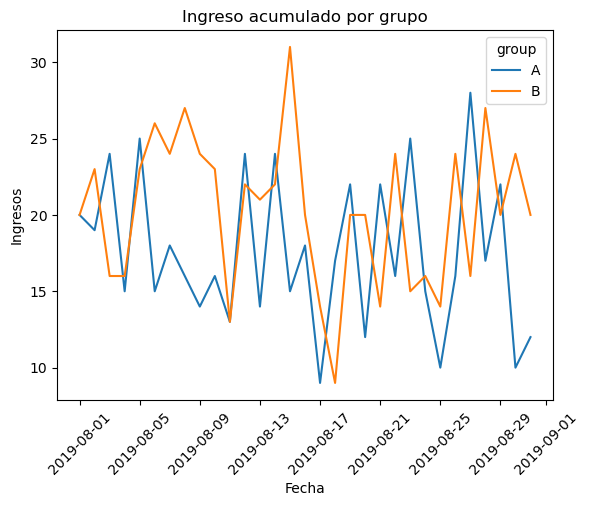

In [67]:
# Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.
sns.lineplot(data=cumulativeData, x='date', y='revenue', hue='group')
plt.xticks(rotation=45)
plt.title('Ingreso acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.show()


#### Se observa que ambos grupos tuvieron un incremento progresivo; sin embargo, en el grupo B en torno al 17 de agosto hubo un incremento exponencial de las ganancias acumuladas.
#### Sería importante ver qué cambio se tuvo en ese momento para poder dar explicación a los datos.

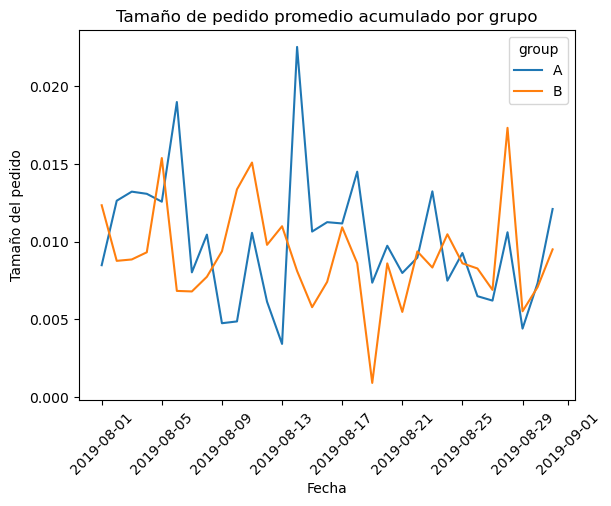

In [68]:
#  Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.
sns.lineplot(data=cumulativeData, x='date', y='siz_ord', hue='group')
plt.xticks(rotation=45)
plt.title('Tamaño de pedido promedio acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Tamaño del pedido')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo, la visualización deja ver la diferencia claramente por cada grupo
</div>

#### De la misma manera, se observa que hay un incremento en el tamaño de orden promedio en torno al 17 de agosto. Esto puede explicar el aumento en las ganancias. Sin embargo, se desconoce de momento la razón de este incremento.



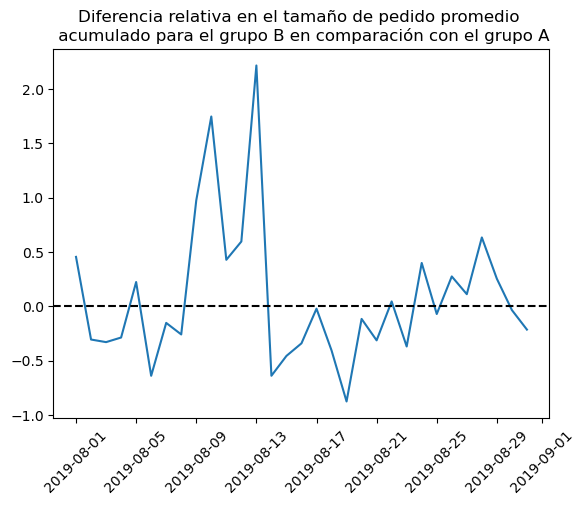

In [69]:
# Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.
# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo A
cumulativeA = cumulativeData[cumulativeData['group'] == 'A']

# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo B
cumulativeB = cumulativeData[cumulativeData['group'] == 'B']


# reunir los datos en un DataFrame
mergedCumulativeRevenue = cumulativeA.merge(
    cumulativeB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# trazar un gráfico de diferencia relativa para los tamaños de compra promedio
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(
    mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# agregar el eje X
plt.axhline(y=0, color='black', linestyle='--')

plt.xticks(rotation=45)
plt.title('Diferencia relativa en el tamaño de pedido promedio \n acumulado para el grupo B en comparación con el grupo A')
plt.show()

#### En continuidad con los hallazgos anteriores, se observa el mismo incremento, pero ahora de manera general, del grupo B en contraste al grupo A. Definitivamente, la estrategia publicitaria es presuntamente más eficiente para el grupo B.


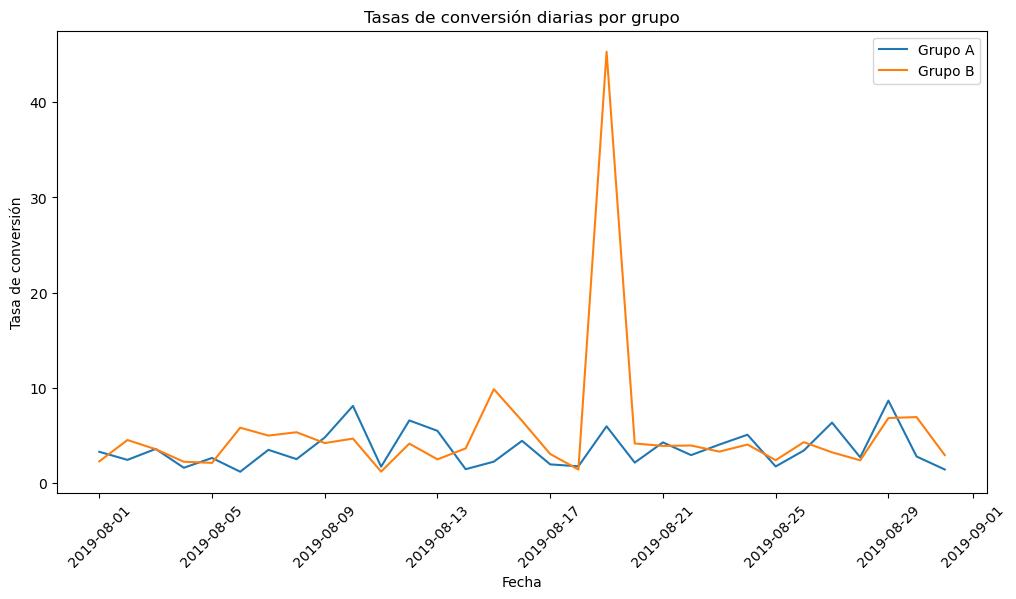

La diferencia media en la tasa de conversión entre el grupo B y el grupo A es: 1.7727


In [70]:

# Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente
# las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.
# Calcula la tasa de conversión diaria para cada grupo
cumulativeData['conversion'] = cumulativeData['orders'] / \
    cumulativeData['visitors']

# Filtra los datos por grupo
conversionA = cumulativeData[cumulativeData['group']
                             == 'A'][['date', 'conversion']]
conversionB = cumulativeData[cumulativeData['group']
                             == 'B'][['date', 'conversion']]

# Representa gráficamente las tasas de conversión diarias de los dos grupos
plt.figure(figsize=(12, 6))
sns.lineplot(data=conversionA, x='date', y='conversion', label='Grupo A')
sns.lineplot(data=conversionB, x='date', y='conversion', label='Grupo B')
plt.xticks(rotation=45)
plt.title('Tasas de conversión diarias por grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de conversión')
plt.legend()
plt.show()

# Describe la diferencia
conversion_diff = conversionB['conversion'].mean(
) - conversionA['conversion'].mean()
print(f"La diferencia media en la tasa de conversión entre el grupo B y el grupo A es: {conversion_diff:.4f}")


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

¿Por qué tienes un salto de línea en esa parte? Eso está causando un error de sintaxis
</div>

#### Las diferencias en la conversión entre grupos se empiezan a notar claramente en torno al 8 de agosto. Esto es una semana después de iniciar el experimento (en caso de que efectivamente así sea). Por lo tanto, se estima que para este tipo de cambio, el periodo crítico es de una semana, y esta diferencia se consolida y mantiene hasta el final.

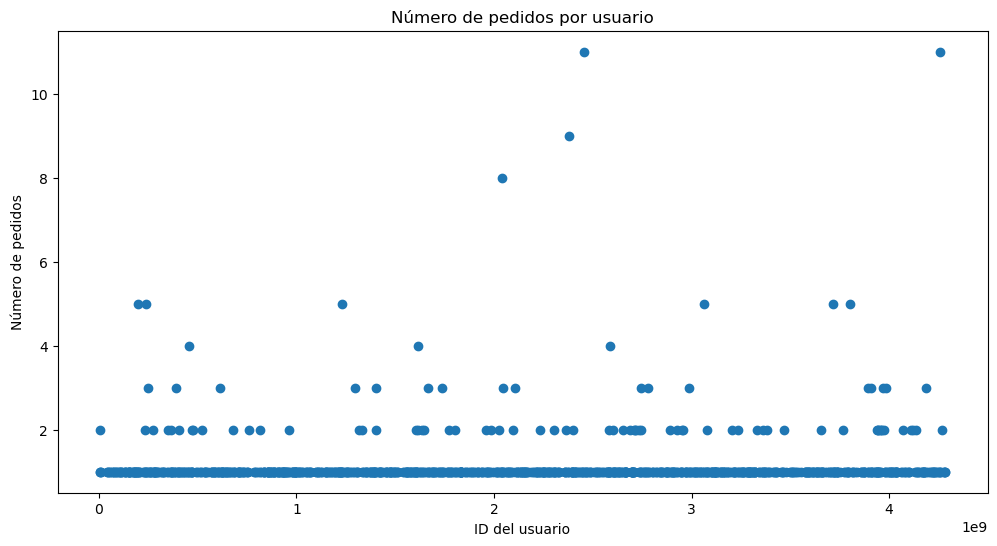

[1. 2. 4.]


In [71]:
# Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.
# Calcula el número de pedidos por usuario
ordersByUsers = orders.groupby('visitorId').agg({'transactionId': 'nunique'}).reset_index()
ordersByUsers.columns = ['visitorId', 'orders']

# Traza un gráfico de dispersión del número de pedidos por usuario
plt.figure(figsize=(12, 6))
plt.scatter(ordersByUsers['visitorId'], ordersByUsers['orders'])
plt.title('Número de pedidos por usuario')
plt.xlabel('ID del usuario')
plt.ylabel('Número de pedidos')
plt.show()
# Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

#### Aquí vemos que el 95% de los usuarios hacen no más de dos pedidos en este periodo de tiempo. Esto se confirma por medio del método percentile. 

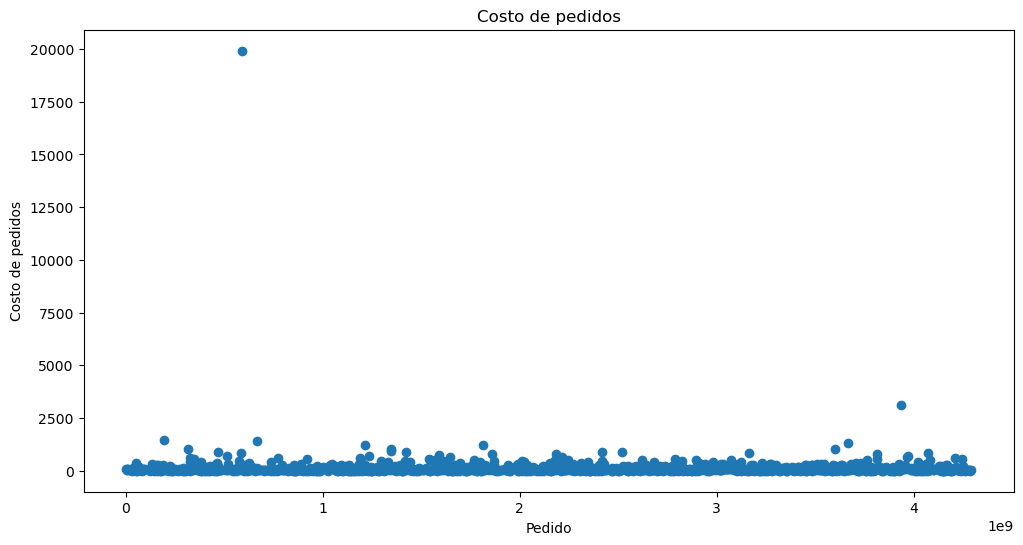

[282.48  435.54  900.904]


In [72]:

# Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.
ordersByprice = orders.groupby('transactionId').agg(
    {'revenue': 'max'}).reset_index()
ordersByprice.columns = ['transactionId', 'Cost']
plt.figure(figsize=(12, 6))
plt.scatter(ordersByprice['transactionId'], ordersByprice['Cost'])
plt.title('Costo de pedidos')
plt.xlabel('Pedido')
plt.ylabel('Costo de pedidos')
plt.show()
# Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.
print(np.percentile(ordersByprice['Cost'], [90, 95, 99]))


#### De la misma manera, para el costo maximo por pedido en promedio, el 95% de los usuarios no gasta más de 435.54 USD en sus órdenes. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo revisando los percentiles, encontrar valores anómalos puede ser crucial al momento de mostrar métricas correctas ya que estos pueden afectar los resultados finales
</div>

In [73]:
# Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
print('Significancia de la diferencia en la conversión de los grupos: {0:.6f}'.format(stats.mannwhitneyu(
    conversionA['conversion'], conversionB['conversion'])[1]))
# Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
print('Significancia de la diferencia del tañaño de pedido de los grupos: {0:.3f}'.format(stats.mannwhitneyu(
    orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]))

Significancia de la diferencia en la conversión de los grupos: 0.167679
Significancia de la diferencia del tañaño de pedido de los grupos: 0.692


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

No se ha definido la variable que se intenta utilizar
</div>

####  En concordancia con lo observado en las gráficas de conversión, se observa que efectivamente existen diferencias estadísticamente significativas entre grupos. 
####  Sin embargo, para el tamaño promedio no se encuentran estas diferencias. Presuntamente, se debe a los outlayers aún presentes en los datos. Se requiere de eliminar para poder llegar a una conclusión esclarecedora.


In [74]:

# Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
# Filtra los usuarios con más de 2 pedidos
usersWithManyOrders = ordersByUsers[ordersByUsers['orders'] > 2]['visitorId']

# Filtra los usuarios con pedidos muy caros
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']

# Combina los filtros
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders]).drop_duplicates()

# Filtra los datos de pedidos eliminando los usuarios anómalos
filteredOrders = orders[np.logical_not(orders['visitorId'].isin(abnormalUsers))]

# Calcula la tasa de conversión diaria para cada grupo con los datos filtrados
filteredCumulativeData = filteredOrders.groupby(['date', 'group']).agg({
    'transactionId': 'nunique',
    'visitorId': 'nunique',
    'revenue': 'sum'
}).reset_index()

filteredCumulativeData = filteredCumulativeData.merge(visits, on=['date', 'group'])
filteredCumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
filteredCumulativeData['conversion'] = filteredCumulativeData['orders'] / filteredCumulativeData['visitors']

# Filtra los datos por grupo
filteredConversionA = filteredCumulativeData[filteredCumulativeData['group'] == 'A'][['date', 'conversion']]
filteredConversionB = filteredCumulativeData[filteredCumulativeData['group'] == 'B'][['date', 'conversion']]

# Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados
print('Significancia de la diferencia en la conversión de los grupos: {0:.6f}'.format(stats.mannwhitneyu(filteredConversionA['conversion'], filteredConversionB['conversion'])[1]))


Significancia de la diferencia en la conversión de los grupos: 0.034705


#### Al retirar los outlayers las diferencias de conversión se disminuyen, pero siguen existiendo estadísticamente. Por lo cual, la estrategia de momento del grupo B es más eficiente

In [75]:
# Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
ordersFilt = orders[orders['revenue'] <
                    np.percentile(ordersByprice['Cost'],95)]

print('Significancia de la diferencia del tamaño de pedido de los grupos: {0:.3f}'.format(stats.mannwhitneyu(
    ordersFilt[ordersFilt['group'] == 'A']['revenue'], ordersFilt[ordersFilt['group'] == 'B']['revenue'])[1]))

Significancia de la diferencia del tamaño de pedido de los grupos: 0.809


#### Sin embargo, aun retirando los outlayers no solo la diferencia en tamaño del pedido no es significativa, sino que las diferencias son aún menores. 
#### Aquí se sugiere hacer un análisis para saber qué proporción de los datos por grupo son outlayers.

In [76]:
# Filtra los datos por grupo
revenueA = orders[orders['group'] == 'A']['revenue']
revenueB = orders[orders['group'] == 'B']['revenue']

# Calcula el porcentaje de datos en revenue mayor a 435.54 para cada grupo
percentageA = (revenueA > 435.54).mean() * 100
percentageB = (revenueB > 435.54).mean() * 100

print(f"Porcentaje de datos en revenue mayor a 435.54 para el grupo A: {percentageA:.2f}%")
print(f"Porcentaje de datos en revenue mayor a 435.54 para el grupo B: {percentageB:.2f}%")

Porcentaje de datos en revenue mayor a 435.54 para el grupo A: 4.67%
Porcentaje de datos en revenue mayor a 435.54 para el grupo B: 5.31%


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

En las celdas anteriores solo está mostrando los resultados numéricos, lo ideal sería que lo muestres cómo en esta celda que con el texto da más contexto de lo que se está mostrando
</div>

#### Después de realizado el análisis, se considera que la diferencia no es tan grande como para poder ser relevante. Se omite hacer una prueba estadística para comparar debido a esto.


#### Se concluye que, a pesar de que la estrategia publicitaria B parece ser más eficiente, no genera más ingresos respecto a la estrategia del grupo A.
#### No así con la conversión entre grupos, la cual sí es considerablemente mejor para el grupo B. 
#### Esto sugiere que, aunque económicamente no se mejora con la estrategia, si se incrementa el porcentaje de visitantes que se decide a realizar una compra, se sugiere explorar alternativas que,,, en conjunto con la estrategia B puedan incrementar el retorno de capital para la empresa 

<div class="alert alert-block alert-danger">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen avance con tu proyecto Elias, pero hay varios puntos que tienen errores de ejecución e incluso un módulo del cual no se ha incluído el código en el notebook para poder revisarlo. Te pediría por favor corregir la ejecución de las celdas y siempre procura reiniciar el kernel y ejecutar desde cero para que puedas identificar los posibles errores.
    
En caso de que trabajes por fuera de la plataforma te pediría que descargues este archivo y lo trabajes sobre este para que mantengas los comentarios y poder dar un correcto seguimiento.
</div>